In [1]:
# import dependencies
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:

# Load data and project
outer_polygon = gpd.read_file("Solomon Islands/Guadalcanal.geojson")
districts = gpd.read_file("Solomon Islands/SDB_districts.geojson")
districts = gpd.clip(districts, outer_polygon)
districts = districts.to_crs("EPSG:32757")  # Projected CRS for Solomon Islands

core = gpd.read_file("Solomon Islands/Honiara_point.geojson")
core = core.to_crs(districts.crs)
core_point = core.geometry.iloc[0]

<Axes: >

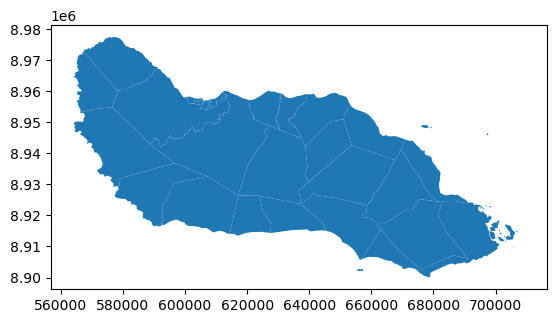

In [3]:
districts.plot()

In [4]:
# calculate centroids
districts['centroid'] = districts.geometry.centroid


<Axes: >

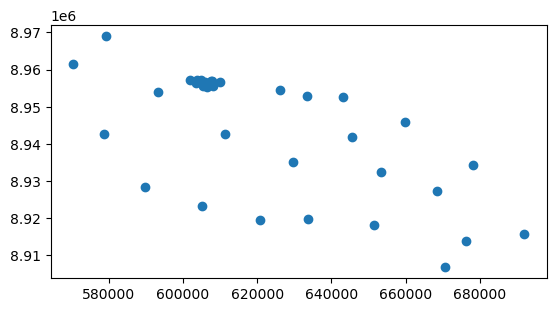

In [5]:
districts['centroid'].plot()

In [6]:
max_dist = -1
farthest_centroid = None
farthest_district = None

for idx, row in districts.iterrows():
    centroid = row['centroid']
    dist = core_point.distance(centroid)
    if dist > max_dist:
        max_dist = dist
        farthest_centroid = centroid
        farthest_district = row['geometry']

In [7]:
longest_line = LineString([core_point, farthest_centroid])

print(f"Longest distance: {max_dist}")
print(f"Line: {longest_line}")

Longest distance: 93204.7122852284
Line: LINESTRING (608194.2707939661 8956638.813327804, 691894.4999143778 8915634.05705048)


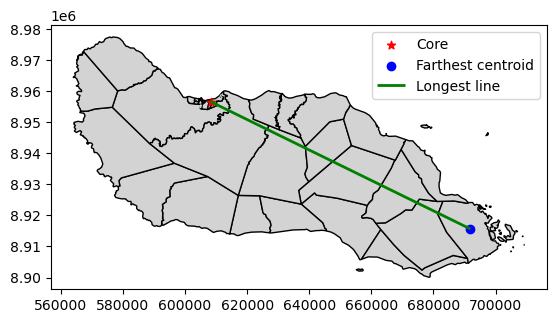

In [8]:
base = districts.plot(color='lightgrey', edgecolor='black')
gpd.GeoSeries([core_point]).plot(ax=base, color='red', marker='*', label='Core')
gpd.GeoSeries([farthest_centroid]).plot(ax=base, color='blue', marker='o', label='Farthest centroid')
gpd.GeoSeries([longest_line]).plot(ax=base, color='green', linewidth=2, label='Longest line')
plt.legend()
plt.show()